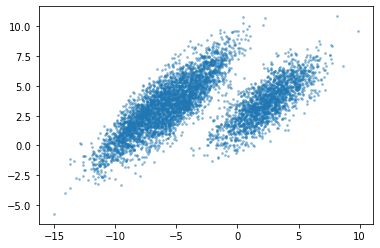

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

def gen_data(k=3,dim=2,points_per_cluster=2000,lim=[-10,10]):
    x=[]
    mean=np.random.rand(k,dim)*(lim[1]-lim[0])+lim[0]
    
    for i in range(k):
        cov=np.random.rand(dim,dim+10)
        cov=np.matmul(cov,cov.T)
        _x=np.random.multivariate_normal(mean[i],cov,points_per_cluster)
        x+=list(_x)
    x=np.array(x)
    if (dim==2):
        fig=plt.figure()
        ax=fig.gca()
        ax.scatter(x[:,0],x[:,1],s=3,alpha=0.4)
        ax.autoscale(enable=True)
    return x
data=gen_data()

In [6]:
gmm=GaussianMixture(n_components=3)
gmm.fit(data)

plt.figure(figsize=(8,6))
plt.scatter(data[:,0],data[:,1],s=3)
for covar,mean in zip (gmm.covariances_,gmm.means_):
    v,w=np.linalg.eigh(covar)
    angle=np.arctan2(w[0][1],w[0][0])
    angle=180*angle/np.pi
    v=2.0*np.sqrt(2.0)*np.sqrt(v)
    ell=plt.matplotlib.patches.Ellipse(mean,v[0],v[1],180+angle,color='r',alpha=0.3)
    plt.gca().add_patch(ell)
plt.xlabel('feature 1')    
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'